In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import pandas as pd

In [31]:
df=pd.read_csv('../preprocessed/amlodipine.csv')

In [ ]:
df['Anxiety and depression ']

In [138]:
%matplotlib inline
def plot(sub):
    cols = sub.columns
    sns.lmplot(cols[0],cols[1],data=df,hue='Groups',fit_reg=False)

In [87]:
features = ['Plasma renin ','Mobility','Anxiety and depression ','VAS','Vasopressin ','VMA']

In [89]:
for i in features:
    for j in features:
        if i == j:
            continue
        sub = [i,j]
        plot(df[sub])
        plt.savefig('../images/All comparisons/'+i+' vs '+j+'.png')

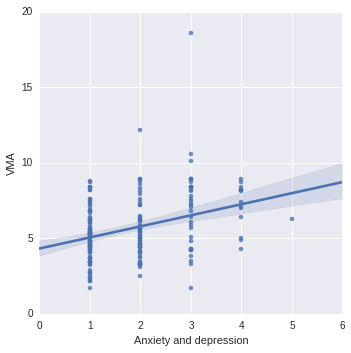

In [151]:
sns.set_style('darkgrid')
sns.lmplot('Anxiety and depression ','VMA',df)
plt.savefig('../images/Anxiety and VMA.png')

In [93]:
data = df.values
label = data[:,0]
X = data[:, 1:data.shape[1]-1]
# Dataset has Label at index 1

In [94]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [135]:
n_neighbors = 8
n_components = 2

In [136]:
from sklearn import manifold
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)

In [107]:
df['x_']=Y[:,0]
df['y_']=Y[:,1]

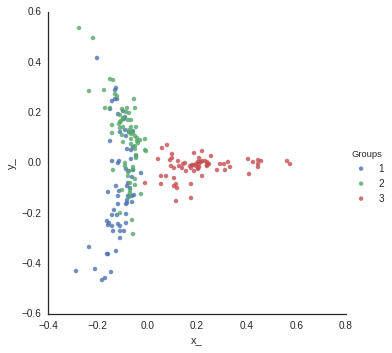

In [137]:
sns.set_style('white')
#sns.set_style('ticks',{"xtick.major.size": 10, "ytick.major.size": 10})
sns.lmplot('x_','y_',data=df,hue='Groups',fit_reg=False)
plt.savefig('../images/manifold_se.png')